<a href="https://colab.research.google.com/github/anastasiia-vsk/Start-into-ML/blob/main/%D0%92%D0%B0%D1%81%D1%8C%D0%BA%D0%BE_%D0%9F%D0%A0_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ЛАБОРАТОРНА РОБОТА 8

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

1. Провести повний аналіз даних.
Датасет знаходиться за посиланням https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset


Датасет містить інформацію про гриби.
  

- Завантажити датасет.

In [3]:
data = pd.read_csv('/content/mushroom_cleaned.csv')

Вивести перші 5 рядків.

In [4]:
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


Вивести розмір датасету, наявність пропущених даних, типи даних. Вивести матрицю кореляції.

In [6]:
print("Розмір датасету:", data.shape)

Розмір датасету: (54035, 9)


In [9]:
print("Пропущені дані:")
data.isnull().sum()

Пропущені дані:


,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


In [10]:
print("Типи даних:")
data.dtypes

Типи даних:


,0
cap-diameter,int64
cap-shape,int64
gill-attachment,int64
gill-color,int64
stem-height,float64
stem-width,int64
stem-color,int64
season,float64
class,int64


In [12]:
# Матриця кореляції
correlation_matrix = data.corr()
correlation_matrix

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
cap-diameter,1.000000,0.204011,0.200481,0.186377,0.135652,0.828469,0.121856,0.113334,-0.165676
cap-shape,0.204011,1.000000,0.043066,0.131387,-0.010393,0.222494,0.029035,0.055442,-0.133338
gill-attachment,0.200481,0.043066,1.000000,0.100276,-0.075284,0.245300,0.020073,-0.040315,-0.052541
gill-color,0.186377,0.131387,0.100276,1.000000,0.015057,0.110283,0.186090,0.059965,-0.063947
stem-height,0.135652,-0.010393,-0.075284,0.015057,1.000000,0.098095,0.002624,-0.000292,0.183354
stem-width,0.828469,0.222494,0.245300,0.110283,0.098095,1.000000,0.157394,0.040679,-0.182856
stem-color,0.121856,0.029035,0.020073,0.186090,0.002624,0.157394,1.000000,0.010750,-0.128339
season,0.113334,0.055442,-0.040315,0.059965,-0.000292,0.040679,0.010750,1.000000,-0.082919
class,-0.165676,-0.133338,-0.052541,-0.063947,0.183354,-0.182856,-0.128339,-0.082919,1.000000


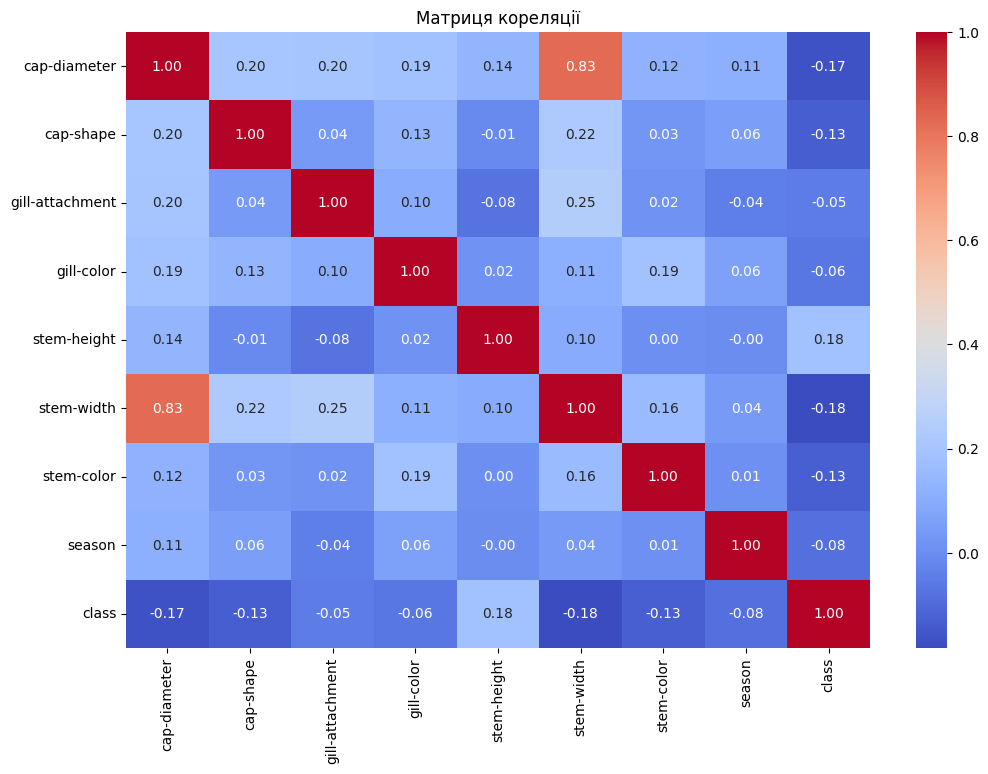

In [13]:
# Візуалізація матриці кореляції
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

Вивевести кореляцію із цільовою функцією.

Кореляція з цільовою функцією 'class':
 cap-diameter      -0.165676
cap-shape         -0.133338
gill-attachment   -0.052541
gill-color        -0.063947
stem-height        0.183354
stem-width        -0.182856
stem-color        -0.128339
season            -0.082919
class              1.000000
Name: class, dtype: float64


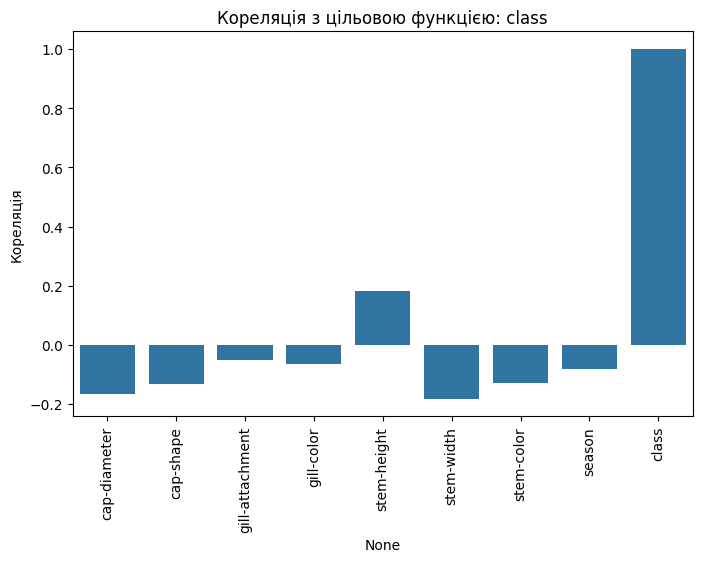

In [14]:
# Цільова функція
target_column = 'class'

# Виведення кореляції з цільовою функцією
correlation_with_target = data.corr()[target_column]
print("Кореляція з цільовою функцією 'class':\n", correlation_with_target)

# Візуалізація кореляції з цільовою функцією
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=90)
plt.title(f'Кореляція з цільовою функцією: {target_column}')
plt.ylabel('Кореляція')
plt.show()

2. Побудувати дві моделі класифікації на вибір (наприклад, Випадковий ліс і логістичну регресію), підібрати параметри.

In [16]:
X = data.drop(columns='class')
y = data['class']

In [17]:
X = pd.get_dummies(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# 1. Логістична регресія
logistic_model = LogisticRegression(max_iter=1000)
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, scoring='accuracy')

In [21]:
# 2. Випадковий ліс
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

3. Оцінити моделі. Вибрати найкращу. Вивести метрики, матрицю плутанини, класифікаційний звіт.

In [20]:
# Оцінка моделі Логістична регресія
logistic_best_model = logistic_grid.best_estimator_
y_pred_logistic = logistic_best_model.predict(X_test)

print("Логістична регресія:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

Логістична регресія:
[[2630 2279]
 [1648 4250]]
              precision    recall  f1-score   support

           0       0.61      0.54      0.57      4909
           1       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.64      0.63     10807



In [22]:
# Оцінка моделі Випадковий ліс
rf_best_model = rf_grid.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)

print("Випадковий ліс:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Випадковий ліс:
[[4857   52]
 [  47 5851]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



4. Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.

In [27]:
inertia = []
silhouette_scores = []

k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

In [29]:
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]

inertia_diff = [inertia[i] - inertia[i + 1] for i in range(len(inertia) - 1)]
optimal_k_elbow = inertia_diff.index(max(inertia_diff)) + 2


print(f'Оптимальна кількість кластерів (метод силуетів): {optimal_k_silhouette}')
print(f'Оптимальна кількість кластерів (метод ліктя): {optimal_k_elbow}')

Оптимальна кількість кластерів (метод силуетів): 2
Оптимальна кількість кластерів (метод ліктя): 2


5. Зробити візуалізацію кількості кластерів двома методами на вибір, наприклад (K-means, DBSCAN).

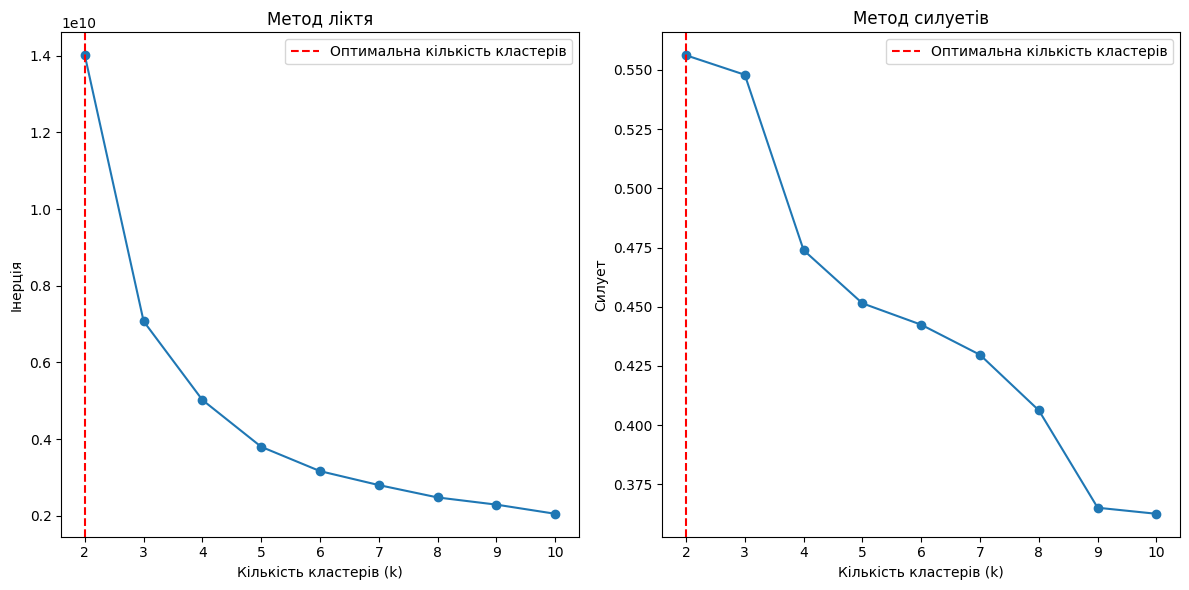

In [30]:
plt.figure(figsize=(12, 6))

# Графік методу ліктя
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.axvline(optimal_k_elbow, color='red', linestyle='--', label='Оптимальна кількість кластерів')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Інерція')
plt.xticks(k_values)
plt.legend()

# Графік методу силуетів
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(optimal_k_silhouette, color='red', linestyle='--', label='Оптимальна кількість кластерів')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Силует')
plt.xticks(k_values)
plt.legend()

plt.tight_layout()
plt.show()

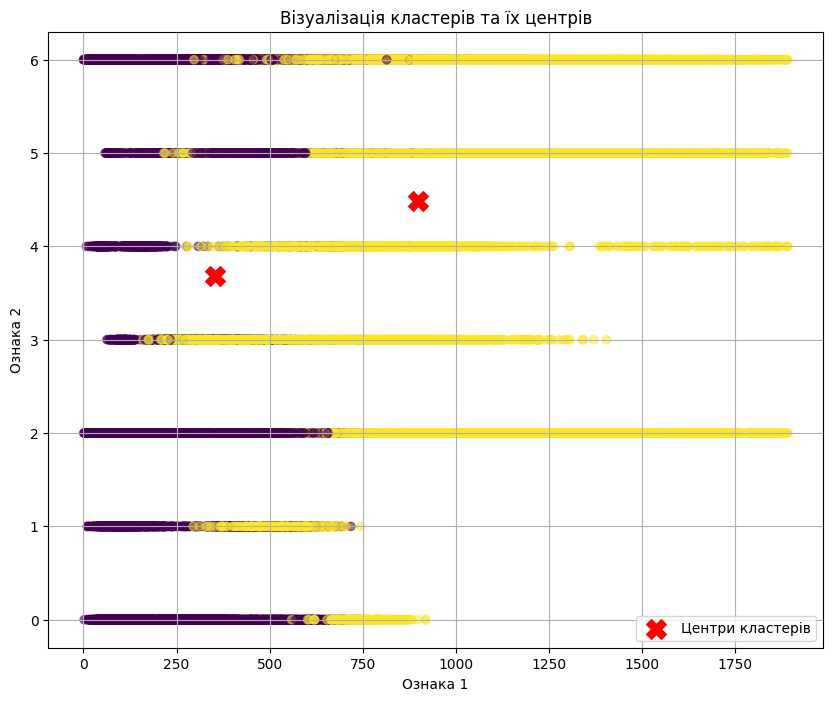

In [33]:
kmeans = KMeans(n_clusters=optimal_k_silhouette, random_state=42)
clusters = kmeans.fit_predict(X)

# Візуалізація за допомогою перших двох ознак (перших двох колонок)
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)

# Відображення центрів кластерів
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Центри кластерів')
plt.title('Візуалізація кластерів та їх центрів')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.legend()
plt.grid()
plt.show()

In [34]:
# Оцінка якості кластеризації
silhouette_avg = silhouette_score(X, clusters)
print(f'Середнє значення метрики силуету: {silhouette_avg:.3f}')

# Інерція (внутрішньо-групова варіація)
print(f'Інерція моделі: {kmeans.inertia_:.3f}')

# Кількість точок у кожному кластері
cluster_sizes = pd.Series(clusters).value_counts()
print('Кількість точок у кожному кластері:')
print(cluster_sizes)

# Відстані до центрів кластерів для кожної точки
distances = kmeans.transform(X)
min_distances = distances.min(axis=1)
print(f'Середня мінімальна відстань до центру кластера: {min_distances.mean():.3f}')

Середнє значення метрики силуету: 0.556
Інерція моделі: 14009926896.797
Кількість точок у кожному кластері:
0    32738
1    21297
Name: count, dtype: int64
Середня мінімальна відстань до центру кластера: 430.515


ВИСНОВКИ

У практичній роботі було проведено аналіз даних із використанням кількох моделей машинного навчання для класифікації та кластеризації.

Спочатку було застосовано модель логістичної регресії з регуляризацією, яка показала середні результати: точність становила 64%, а показники precision і recall були кращими для класу 1. Це свідчить про те, що модель дещо краще передбачала позитивні результати, хоча загальна точність була обмеженою.

Далі було випробувано модель випадкового лісу, яка, незважаючи на використання регуляризації, виявилася перенавченою. Модель досягла майже ідеальної точності 99%, що може свідчити про її переналаштування на тренувальні дані, що зменшує здатність до генералізації на нові дані.

У процесі кластеризації за допомогою алгоритму KMeans було визначено оптимальну кількість кластерів як 2. Метрика силуету становила 0.556, що вказує на адекватне, але не ідеальне, розподілення точок між кластерами.

Таким чином, результати показали, що логістична регресія краще підходить для запобігання перенавчанню, тоді як випадковий ліс продемонстрував значно кращі метрики, але потребує додаткових заходів для поліпшення узагальнення.